<a href="https://colab.research.google.com/github/ninichang/py-and-fs/blob/master/ML_Assignment_1_Regression_Using_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Generate 50 2D-data points using the following function: $y=0.4345x^3-5.607x^2+16.78x-10.61$


In [ ]:
import numpy as np
import random 

X = []
Y = []

def generate_data(n):
    for i in range(n):
        # Generate X coordinate in from 0 to 9
        x = np.random.uniform(0, 9)
        X.append(x)
        Y.append(0.4345*(x**3) - 5.607*(x**2) + 16.78*x - 10.61)
    return X, Y

generate_data(50)

# Make X and Y into an array
X = np.array(X)
Y = np.array(Y)

data = np.stack((X, Y), axis=-1)
print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[  1.90804296   4.0122032 ]
 [  5.26214136 -14.25910764]
 [  0.53258884  -3.19795015]
 [  8.51623631  -5.99307537]
 [  1.85480599   3.99644034]]


### 2. Add Gaussian random noise to the data. 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution() :
    x = np.arange(0,9,0.5)
    y = 0.4345 * np.power(x, 3) - 5.607 * np.power ( x, 2) + 16.78 * x - 10.61
    return x,y

def add_noise(y_curve) :
    mu = 0
    sigma = 4.0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

In [ ]:
# Add noise to Y coordinates
Y_noise = add_noise(Y)

# Rename data as data_noise and create a new array with updated Y cooridnates
data_noise = np.stack((X, Y_noise), axis=-1)

print('First 5 rows of noisy data:\n', data_noise[0:5])

First 5 rows of noisy data:
 [[  1.90804296   3.21604555]
 [  5.26214136 -13.31479705]
 [  0.53258884  -4.31845442]
 [  8.51623631  -4.7458522 ]
 [  1.85480599   2.42589241]]


### 3. Fit the generated noisy data using the least squares method based on a polynomial function.

In [ ]:
# method 1
def least_squares1(X, M, t):
    
    # t = ground truth (label) from the noisy data
    # N x 1
    t = np.reshape(Y_noise, (50, 1))
    
    # Initialize matrixX with a matrix of dimension N x 0
    matrixX= np.zeros((len(X), 0))
    
    # Update each column of matrix X with the appropriate power, from 0 to M-1
    for m in range(M):
        matrixX = np.c_[matrixX, X**m]
            
    # perform checks if the dimention is not right
    if matrixX.shape != (len(X), M):
        print('Dimention of matrix X is wrong')

    transposeX = np.transpose(matrixX)
    inverse = np.linalg.inv(np.dot(transposeX,matrixX))
    return np.dot(np.dot(inverse, transposeX), t)


print('Output params with method 1: \n', least_squares1(X, 4, Y_noise))

Output params with method 1: 
 [[-11.12755871]
 [ 16.40425253]
 [ -5.36044661]
 [  0.4100238 ]]


In [ ]:
def solver(x, m):
    n = len(x)
    matrix = np.empty((n,m))
    for i in range(0,n):
        for j in range (0,m):
            matrix[i,j] = x[i]**j
    one = np.transpose(matrix)
    two = np.matmul(one, matrix)
    three = np.linalg.inv(two)
    four = np.matmul(three, np.transpose(matrix))
    w = np.matmul(four, Y_noise)
    return(w)

print('Output params with method 1: \n',solver(X, 4))

Output params with method 1: 
 [-11.12755871  16.40425253  -5.36044661   0.4100238 ]


In [ ]:
# method 2

def least_squares2(X, M, t):
    
    # Initialize matrixX with a matrix of dimension N x 0
    matrixX= np.zeros((len(X), 0))
    
    # Update each column of matrix X with the appropriate power, from 0 to M-1
    for m in range(M):
        matrixX = np.c_[matrixX, X**m]
    
    # perform checks if the dimention is not right
    if matrixX.shape != (len(X), M):
        print('Dimention of X is wrong')

    pseudoX = np.linalg.pinv(matrixX)
    # M x N
    
    return np.dot(pseudoX, t)

print('Output params with method 2: \n', least_squares2(X, 4, Y_noise))

Output params with method 2: 
 [-11.12755871  16.40425253  -5.36044661   0.4100238 ]


### 4. Show the original curve line, the noisy data, and the curve line estimated from the noisy data

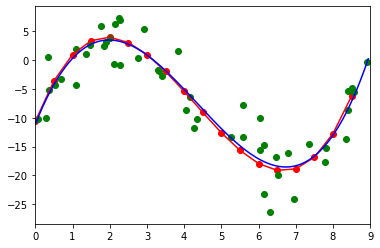

In [ ]:
def plot(X, X_axis_lower_bound, X_axis_upper_bound, X_axis_gap, Y_noise, M, actual_distribution):
    
    # The red line is the original curve based on the equation. 
    plt.scatter(actual_distribution[0], actual_distribution[1], color="red")

    plt.plot(actual_distribution[0], actual_distribution[1], '-g', label='function', color="red")


    # The green dots are the noisy data. 
    plt.scatter(X, Y_noise, color="green")

    # The blue line is the estimated fitting line, by setting M
    w = least_squares2(X, M, Y_noise)

    fitted_Y = []
    
    # X_axis is used to fit the curve line estimated from the noisy data
    X_axis = np.arange(X_axis_lower_bound, X_axis_upper_bound, X_axis_gap)

    def fit_Y(X_axis):
        for i in (X_axis):
            fitted_value_each = 0
            for w_index in range(M):
                fitted_value_each += w[w_index]*(i**w_index)
            fitted_Y.append(fitted_value_each)
        return fitted_Y

    plt.plot(X_axis, fit_Y(X_axis), '-g', label='function', color="blue")
    plt.xlim(X_axis_lower_bound, X_axis_upper_bound);
    

plot(X, 0, 9, 0.05, Y_noise, 4, actual_distribution())

### 5. Compute and display the error value, E(w) 

In [ ]:
def error(y_n, t_n):
    error = 0.5* np.dot(np.transpose(y_n - t_n), (y_n - t_n))
    return error
    
print('E(W) = ', error(Y, Y_noise))

E(W) =  299.3935838788044


### 6. Display the estimated values of w 

In [ ]:
def display_w(X, M, t_n):
    return least_squares1(X, M,t_n)
    
print('The parameters (w) = \n', display_w(X, 4, Y_noise))

The parameters (w) = 
 [[-11.12755871]
 [ 16.40425253]
 [ -5.36044661]
 [  0.4100238 ]]


### 7. Experiment with your code by changing M to various values. Plot the values of M against those of E(w), meaning: project them onto a 2D space, where the x-axis is M and the y-axis is E(w). Try to understand the cases of underfitting and overfitting, and how they relate to the error value, E(w) 

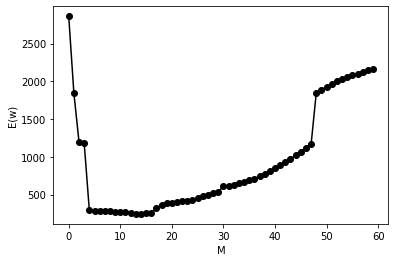

In [ ]:
def plotM(X, M_range, Y_noise):
    
    errors = []
    Ms = []

    for M in range(M_range):
        Ms.append(M)
        w = least_squares2(X, M, Y_noise)
        y_n = 0
        for m_index in range(M):
            y_n += w[m_index]*X**(m_index)
        errors.append(error(y_n, Y_noise))

    plt.scatter(Ms, errors, color="black")
    plt.plot(Ms, errors, '-g', color="black")
    plt.xlabel("M")
    plt.ylabel("E(w)")

plotM(X, 60, Y_noise)

### 8. Change the noise levels, and apply the the same operations above 

E(w):  1271.7976452571113
Parameters w: 
 [[-11.12755871]
 [ 16.40425253]
 [ -5.36044661]
 [  0.4100238 ]]


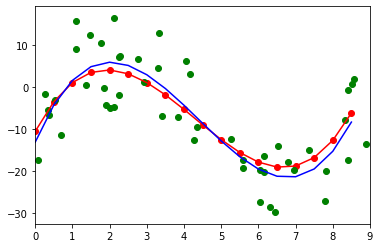

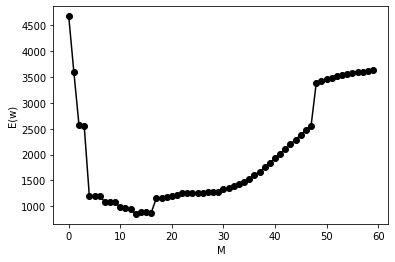

In [ ]:
# Add noise 3 times
Y_super_noise = add_noise(add_noise(add_noise(Y)))

# Fit noisy data
least_squares1(X, 4, Y_super_noise)

# Show the original curve line, the noisy data, and the curve line estimated from the noisy data
plot(X, 0, 9, 0.5, Y_super_noise, 4, actual_distribution())

# Compute E(W)
print('E(w): ', error(Y, Y_super_noise))

# Display parameters w
print('Parameters w: \n', display_w(X, 4, Y_super_noise))

plt.subplots(nrows=1, ncols=1)

# Plot M and E(W) with M ranging from 0 to 60
plotM(X, 60, Y_super_noise)

### 9. Change the function for generating the data to: $y=sin(x^2+1)$, and apply the same operations as above 

Parameters (w): [ 0.83830699 -0.03519727  0.98377007 -0.8485204 ]


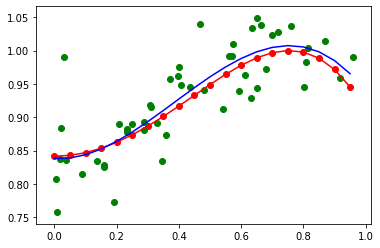

In [ ]:
# Exercise 1
# New function that generates data using the new formula

X2 = []
Y2 = []

def generate_data2(n):
    for i in range(n):
        x2 = np.random.uniform(0, 1)
        X2.append(x2)
        Y2.append(np.sin(x2**2+1))

generate_data2(50)

def actual_distribution2() :
    x = np.arange(0,1,0.05)
    y = np.sin(x**2+1)
    return x,y

def add_noise2(y_curve) :
    mu = 0
    sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

# Make X2 and Y2 into numpy arrays
X2 = np.array(X2)
Y2 = np.array(Y2)

# Exercise 2
Y2_noise = add_noise2(Y2)

# Exercise 3
w = least_squares2(X2, 4, Y2_noise)
print('Parameters (w):', w)

# Exercise 4
plt.scatter(actual_distribution2()[0], actual_distribution2()[1], color="red")
plt.plot(actual_distribution2()[0], actual_distribution2()[1], '-g', label='function', color="red")
plt.scatter(X2, Y2_noise, color="green")

fitted_Y = []
def fit_Y(X_axis, M):
    for i in (X_axis):
        fitted_value_each = 0
        for w_index in range(M):
            fitted_value_each = fitted_value_each + w[w_index]*(i**w_index)
        fitted_Y.append(fitted_value_each)
    return fitted_Y

plt.plot(actual_distribution2()[0], fit_Y(actual_distribution2()[0], 4), '-g', label='function', color="blue")

When M = 12, w = 
 [ 6.78954551e-01  1.81186951e+01 -5.06924103e+02  6.28560351e+03
 -4.30144070e+04  1.80230381e+05 -4.86248379e+05  8.61467571e+05
 -9.96173962e+05  7.23800976e+05 -2.99910036e+05  5.40518074e+04]


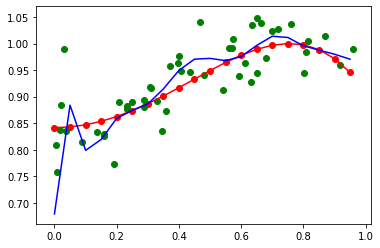

In [ ]:
# See the effect of overfitting, when M = 12

w = least_squares2(X2, 12, Y2_noise)
print('When M = 12, w = \n', w)

# Exercise 4
plt.scatter(actual_distribution2()[0], actual_distribution2()[1], color="red")
plt.plot(actual_distribution2()[0], actual_distribution2()[1], '-g', label='function', color="red")
plt.scatter(X2, Y2_noise, color="green")

fitted_Y = []
def fit_Y(X_axis, M):
    for i in (X_axis):
        fitted_value_each = 0
        for w_index in range(M):
            fitted_value_each = fitted_value_each + w[w_index]*(i**w_index)
        fitted_Y.append(fitted_value_each)
    return fitted_Y

plt.plot(actual_distribution2()[0], fit_Y(actual_distribution2()[0], 12), '-g', label='function', color="blue")


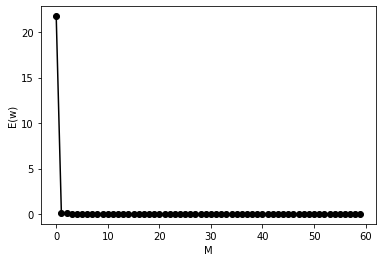

In [ ]:
# Exercise 5
error(Y2, Y2_noise)

# Exercise 6
display_w(X2, 4, Y2_noise)
plt.subplots(nrows=1, ncols=1)

# Exercise 7
plotM(X2, 60, Y2_noise)

Parameters (w): [ 0.80037791  0.10007243  0.91977345 -0.92795186]
E(w):  0.11615488429028448
w: 
 [[ -6.81426621]
 [-14.55530693]
 [ 47.94166569]
 [-32.32770659]]


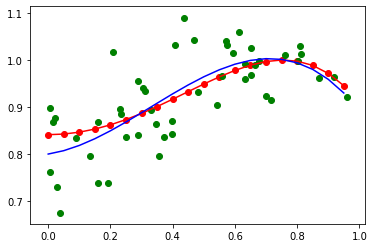

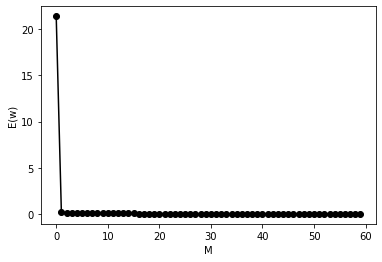

In [ ]:
# Exercise 8: Add noise and apply same operations above.

# Add noise 3 times
Y2_super_noise = add_noise2(add_noise2(add_noise2(Y2)))

# Fit noisy data
w = least_squares2(X2, 4, Y2_super_noise)
print('Parameters (w):', w)

# Exercise 4: Show the original curve line, the noisy data, and the curve line estimated from the noisy data
fitted_Y = []
plt.scatter(actual_distribution2()[0], actual_distribution2()[1], color="red")
plt.plot(actual_distribution2()[0], actual_distribution2()[1], '-g', label='function', color="red")
plt.scatter(X2, Y2_super_noise, color="green")
plt.plot(actual_distribution2()[0], fit_Y(actual_distribution2()[0], 4), '-g', label='function', color="blue")

# Compute E(W)
print('E(w): ', error(Y2, Y2_super_noise))

# Display parameters w
print('w: \n', display_w(X2, 4, Y2_super_noise))

plt.subplots(nrows=1, ncols=1)

# Plot M and E(W)
plotM(X2, 60, Y2_super_noise)

(0, 0.5)

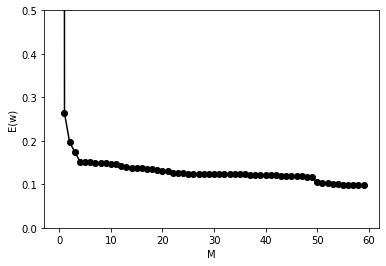

In [ ]:
# Zoom in on the plot
plotM(X2, 60, Y2_super_noise)
plt.ylim(0, 0.5)